In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import comb

np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [33]:
# Q2
def p_Z(Z, rho, p):
    V = (-np.sqrt(rho)*Z + norm.ppf(p)) / np.sqrt(1 - rho)
    expr = norm.cdf(V)
    return expr

# Q4
def partial_p_Z(Z, rho, p):
    V = (-np.sqrt(rho)*Z + norm.ppf(p)) / np.sqrt(1 - rho)
    expr = norm.pdf(V) * (-Z + np.sqrt(rho)*norm.ppf(p)) / (2*(1-rho)*np.sqrt(rho*(1-rho)))
    return expr

# Q5
def E_L(N, k, Z, rho, p):
    expr = comb(N, k, exact=True) * p_Z(Z, rho, p)**k * (1 - p_Z(Z, rho, p))**(N-k)
    return expr

# Q6
def partial_E_L(N, k, Z, rho, p):
    """
    # more concise (and equivalent) expression but less precision near endpoints (0 and 1)
    expr = E_L(N, k, Z, rho, p) * (k/p_Z(Z, rho, p) - (N - k)/(1 - p_Z(Z, rho, p))) * partial_p_Z(Z, rho, p)
    """
    expr = comb(N, k, exact=True) * partial_p_Z(Z, rho, p) * (k * p_Z(Z, rho, p)**(k-1) * (1-p_Z(Z, rho, p))**(N-k) - (N-k) * p_Z(Z, rho, p)**k * (1-p_Z(Z, rho, p))**(N-k-1))
    return expr

# Q8
def first_loss(K, N, Z, rho, p):
    expr = np.sum(E_min(K, N, Z, rho, p)) / Z.shape[0]
    return expr

# Q8 helper function
def E_min(K, N, Z, rho, p):
    expr = np.sum([(j - N*K)*E_L(N, j, Z, rho, p) for j in range(int(N*K))], axis=0)
    return K + expr / N

# Q9
def corr_risk(K, N, Z, rho, p):
    expr = np.sum(np.sum([(j - N*K)*partial_E_L(N, j, Z, rho, p) for j in range(int(N*K))], axis=0)) / Z.shape[0]
    return expr / N

exact first-loss amount when rho = 0: 0.0489086268711488


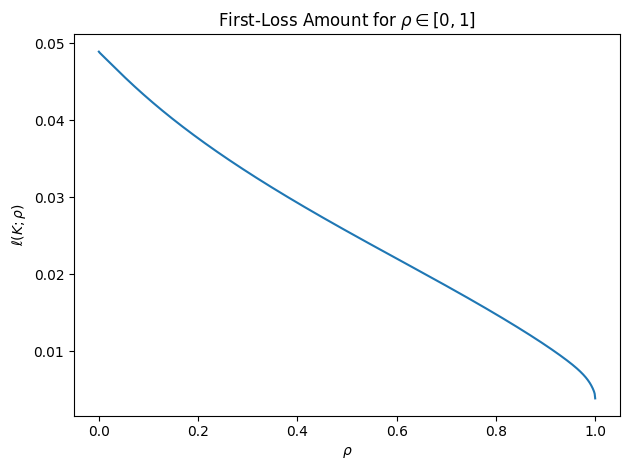

In [55]:
# Q8 main script
np.random.seed(1941)

p = 0.05
K = 0.08
N = 100
N_sim = 5000

exact_sol_rho_0 = K + np.sum([(j - N*K) * comb(N, j, exact=True) * p**j * (1-p)**(N-j) for j in range(int(N*K))]) / N
print(f"exact first-loss amount when rho = 0: {exact_sol_rho_0}")

Z = np.random.standard_normal(size=N_sim)
rhos = np.linspace(0, 1, 1001, endpoint=True)
losses = []
for rho in rhos:
    loss = first_loss(K, N, Z, rho, p)
    losses.append(loss)
fig, ax = plt.subplots()
ax.plot(rhos, losses)
ax.set(xlabel=r'$\rho$', ylabel=r'$\ell(K;\rho)$')
ax.set_title(r"First-Loss Amount for $\rho \in [0, 1]$")
# ax.legend()
plt.tight_layout()
plt.show()
fig.savefig("first_loss.png")

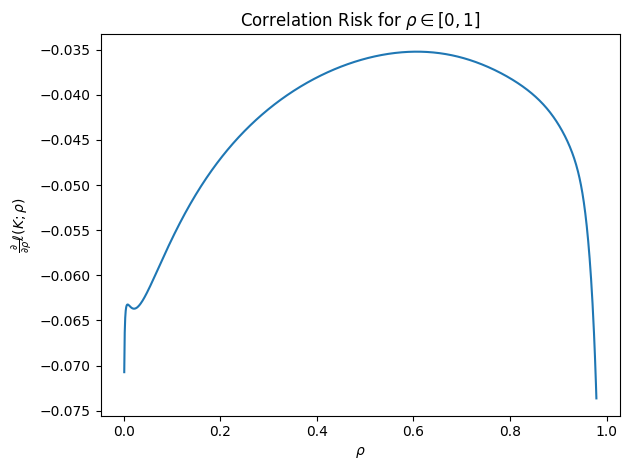

In [62]:
# Q9 main script
np.random.seed(1941)

p = 0.05
K = 0.08
N = 100
N_sim = 5000

Z = np.random.standard_normal(size=N_sim)
rhos = np.linspace(0, 1, 1001, endpoint=True)
risks = []
for rho in rhos:
    risk = corr_risk(K, N, Z, rho, p)
    risks.append(risk)
fig, ax = plt.subplots()
ax.plot(rhos, risks)
ax.set(xlabel=r'$\rho$', ylabel=r'$\frac{\partial}{\partial \rho}\ell(K;\rho)$')
ax.set_title(r"Correlation Risk for $\rho \in [0, 1]$")
# ax.legend()
plt.tight_layout()
plt.show()
fig.savefig("corr_risk.png")

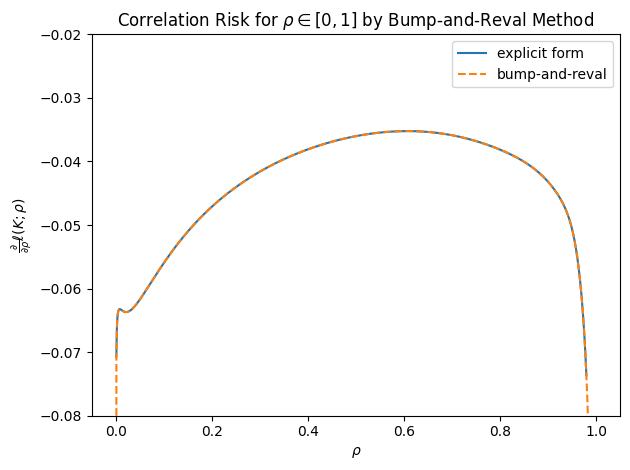

In [60]:
# Q10 main script
np.random.seed(1941)

p = 0.05
K = 0.08
N = 100
N_sim = 5000
eps = 1e-6

Z = np.random.standard_normal(size=N_sim)
rhos = np.linspace(0, 1, 1001, endpoint=True)
bnrs = []  # "bump-and-reval" values
for rho in rhos:
    bnr = (first_loss(K, N, Z, rho+eps, p) - first_loss(K, N, Z, rho, p)) / eps
    bnrs.append(bnr)
fig, ax = plt.subplots()
ax.plot(rhos, risks, label="explicit form")
ax.plot(rhos, bnrs, label="bump-and-reval", linestyle="dashed")
ax.set(xlabel=r'$\rho$', ylabel=r'$\frac{\partial}{\partial \rho}\ell(K;\rho)$')
ax.set_title(r"Correlation Risk for $\rho \in [0, 1]$ by Bump-and-Reval Method")
ax.set_ylim([-0.08, -0.02])
ax.legend()
plt.tight_layout()
plt.show()
fig.savefig("bnr.png")